# 資料前處理

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest

data_path = "data"

train_df = pd.read_csv(data_path+"/train.csv")
test_df = pd.read_csv(data_path+"/test.csv")

# 保存ID
test_id = test_df.Id

# 填補缺失值，填補0
for col in test_df:
    if test_df[col].dtypes == 'object':
        train_df.fillna('None',inplace=True)
        test_df.fillna('None',inplace=True)
    else:
        train_df.fillna(0,inplace=True)
        test_df.fillna(0,inplace=True)

'''
# 替換字串，由於存在評比以文字的方式記錄的欄位，所以將這類欄位轉換為數值型欄位
LotShape_dict = {'Reg':0,'IR1':1,'IR2':2,'IR3':3, 0:-1}

BsmtExposure_dict = {'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NA':-1, 0:-1}
BsmtFinType_dict = {'GLQ':5 ,'ALQ':4 ,'BLQ':3 ,'Rec':2 ,'LwQ':1 ,'Unf':0 ,'NA':-1 , 0:-1}
CentralAir_dict = {'N':0 , 'Y':1, 0:-1}

for col in score_dict_col_list:
    train_df[col] = train_df[col].apply(lambda x: score_dict[x]).astype('int32')
    test_df[col] = test_df[col].apply(lambda x: score_dict[x]).astype('int32')

score_dict = {'Ex':4 ,'Gd':3 ,'TA':2 ,'Fa':1 ,'Po':0, 'NA':-1, 0:-1}
score_dict_col_list = ['ExterQual','ExterCond','BsmtCond','HeatingQC','KitchenQual',
                      'FireplaceQu','GarageQual','GarageCond','PoolQC']

train_df['LotShape'] = train_df['LotShape'].apply(lambda x: LotShape_dict[x]).astype('int32')
test_df['LotShape'] = test_df['LotShape'].apply(lambda x: LotShape_dict[x]).astype('int32')

train_df['BsmtExposure'] = train_df['BsmtExposure'].apply(lambda x: BsmtExposure_dict[x]).astype('int32')
test_df['BsmtExposure'] = test_df['BsmtExposure'].apply(lambda x: BsmtExposure_dict[x]).astype('int32')

train_df['BsmtFinType1'] = train_df['BsmtFinType1'].apply(lambda x: BsmtFinType_dict[x]).astype('int32')
test_df['BsmtFinType1'] = test_df['BsmtFinType1'].apply(lambda x: BsmtFinType_dict[x]).astype('int32')
train_df['BsmtFinType2'] = train_df['BsmtFinType2'].apply(lambda x: BsmtFinType_dict[x]).astype('int32')
test_df['BsmtFinType2'] = test_df['BsmtFinType2'].apply(lambda x: BsmtFinType_dict[x]).astype('int32')

train_df['CentralAir'] = train_df['CentralAir'].apply(lambda x: CentralAir_dict[x]).astype('int32')
test_df['CentralAir'] = test_df['CentralAir'].apply(lambda x: CentralAir_dict[x]).astype('int32')
'''

# 只選取非類別的feature
train_df = train_df.select_dtypes(exclude=['object'])
test_df = test_df.select_dtypes(exclude=['object'])

'''
# 消除無意義的數值欄位
nomeans_num_col = ['MSSubClass']
train_df = train_df.drop(columns=nomeans_num_col)
test_df = test_df.drop(columns=nomeans_num_col)
'''
train_len = train_df.shape[0]
test_len = test_df.shape[0]

# isolation forest
isof = IsolationForest()
isof.fit(train_df)
y_noano = isof.predict(train_df)
normal_index = pd.DataFrame(y_noano,columns=['normal_index'],index=train_df.index)
# 僅保留資料正常值，y_noano為1者
train_df = train_df[normal_index['normal_index']==1]


df_train_y = train_df['SalePrice'].values.reshape(-1,1)
price_scaler = MinMaxScaler()
price_scaler.fit(df_train_y)
norm_train_y = price_scaler.transform(df_train_y)
norm_train_y = pd.DataFrame(norm_train_y,columns=['price'])

train_df.drop(columns=['SalePrice','Id'],inplace=True)
test_df.drop(columns=['Id'],inplace=True)

# normalized
train_len = train_df.shape[0]
test_len = test_df.shape[0]

min_scaler = MinMaxScaler()
df = pd.concat([train_df,test_df],sort=False)

for col in df:
    df[col] = min_scaler.fit_transform(df[col].values.reshape(-1,1))

norm_train_x = df[0:train_len]
norm_test_x = df[train_len:]

print(norm_train_x.shape)
print(norm_test_x.shape)

# 建立validation set
train_x, val_x, train_y, val_y = train_test_split(norm_train_x,norm_train_y)
train_x.head()



(1375, 36)
(1459, 36)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1147,0.294118,0.239617,0.093984,0.666667,0.750,0.488889,0.000000,0.0000,0.068579,0.0,...,0.157258,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.545455,0.75
570,0.411765,0.236422,0.103655,0.444444,0.500,0.666667,0.250000,0.0675,0.057606,0.0,...,0.387097,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.909091,0.50
285,0.823529,0.111821,0.025920,0.666667,0.500,0.970370,0.950000,0.0000,0.000000,0.0,...,0.354839,0.00000,0.072776,0.0,0.0,0.0,0.0,0.0,0.454545,0.25
59,0.000000,0.191693,0.051823,0.444444,0.750,0.718519,0.366667,0.0000,0.157606,0.0,...,0.236559,0.13764,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.50
427,0.000000,0.246006,0.064059,0.333333,0.625,0.607407,0.116667,0.0000,0.071820,0.0,...,0.236559,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.545455,0.50


# 深度學習模型
# 建立模型

In [10]:
import keras


layer_list = [keras.layers.Dense(500,input_shape=(train_x.shape[1],),activation='relu'),
              keras.layers.Dense(100,activation='relu'),
              keras.layers.Dense(50,activation='relu'),
              keras.layers.Dense(25,activation='relu'),
             keras.layers.Dense(1)]

model = keras.Sequential(layer_list)
model.compile(loss='mean_squared_error',
             optimizer=keras.optimizers.Adam())

training_process = model.fit(train_x,train_y,
                            epochs=50,
                            batch_size=10,
                            validation_data=(val_x,val_y))


Train on 1031 samples, validate on 344 samples
Epoch 1/50
1031/1031 [==============================] - 0s 433us/step - loss: 0.0095 - val_loss: 0.0070
Epoch 2/50
1031/1031 [==============================] - 0s 284us/step - loss: 0.0037 - val_loss: 0.0042
Epoch 3/50
1031/1031 [==============================] - 0s 299us/step - loss: 0.0028 - val_loss: 0.0054
Epoch 4/50
1031/1031 [==============================] - 0s 294us/step - loss: 0.0027 - val_loss: 0.0047
Epoch 5/50
1031/1031 [==============================] - 0s 283us/step - loss: 0.0030 - val_loss: 0.0077
Epoch 6/50
1031/1031 [==============================] - 0s 313us/step - loss: 0.0026 - val_loss: 0.0031
Epoch 7/50
1031/1031 [==============================] - 0s 283us/step - loss: 0.0026 - val_loss: 0.0031
Epoch 8/50
1031/1031 [==============================] - 0s 279us/step - loss: 0.0024 - val_loss: 0.0042
Epoch 9/50
1031/1031 [==============================] - 0s 289us/step - loss: 0.0025 - val_loss: 0.0035
Epoch 10/50
1031/

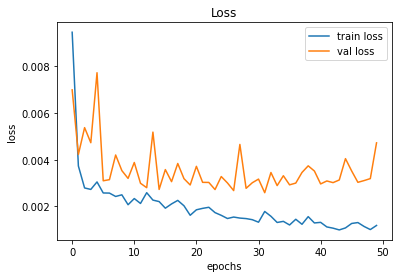

In [13]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(training_process.history['loss'],label='train loss')
plt.plot(training_process.history['val_loss'],label='val loss')
plt.legend()
plt.show()

In [ ]:
predict_norm = model.predict(norm_test_x)
predict = price_scaler.inverse_transform(predict_norm)

# 做成Dataframe
predict = pd.DataFrame(predict,columns=['SalePrice'])
output_df = pd.concat([test_id,predict],axis=1)
output_df.to_csv('res.csv',index=False)
output_df.head()
